In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

se carga el csv (excel es cancer)

In [5]:
df = pd.read_csv('data.csv', index_col='ID')

In [6]:
df

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,,
1,25,49,91107,4,"1,60",1,0,0
2,45,34,90089,3,"1,50",1,0,0
3,39,11,94720,1,"1,00",1,0,0
4,35,100,94112,1,"2,70",2,0,0
5,35,45,91330,4,"1,00",2,0,0
...,...,...,...,...,...,...,...,...
4996,29,40,92697,1,"1,90",3,0,0
4997,30,15,92037,4,"0,40",1,85,0
4998,63,24,93023,2,"0,30",3,0,0


Eliminamos el zip code porque no estamos haciendo un análisis espacial, todo lo demàs puede ser información relevante

In [9]:
df = df.drop(['ZIP Code'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            5000 non-null   int64 
 1   Income         5000 non-null   int64 
 2   Family         5000 non-null   int64 
 3   CCAvg          5000 non-null   object
 4   Education      5000 non-null   int64 
 5   Mortgage       5000 non-null   int64 
 6   Personal Loan  5000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 312.5+ KB


b) Determine cuáles son las variables predictoras que son categorías y obtenga
las variables dummies correspondientes para incluirlas en el modelo.
Recuerde que puede usar la función get_dummies() de pandas.

TRansformamos datos a float cuando es necesario, y categorizamos y creamos dummy variable

In [17]:
df['CCAvg'] = df['CCAvg'].apply(lambda x: x.replace(',', '.')).astype(float)

In [18]:
# (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)

df = df.replace({'Education': {1: 'No Graduado', 2: 'Graduado', 3: 'Estudios Especializados'}})

In [20]:
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

In [21]:
df

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Education_Graduado,Education_No Graduado
ID,,,,,,,,
1,25,49,4,1.6,0,0,False,True
2,45,34,3,1.5,0,0,False,True
3,39,11,1,1.0,0,0,False,True
4,35,100,1,2.7,0,0,True,False
5,35,45,4,1.0,0,0,True,False
...,...,...,...,...,...,...,...,...
4996,29,40,1,1.9,0,0,False,False
4997,30,15,4,0.4,85,0,False,True
4998,63,24,2,0.3,0,0,False,False


<Axes: >

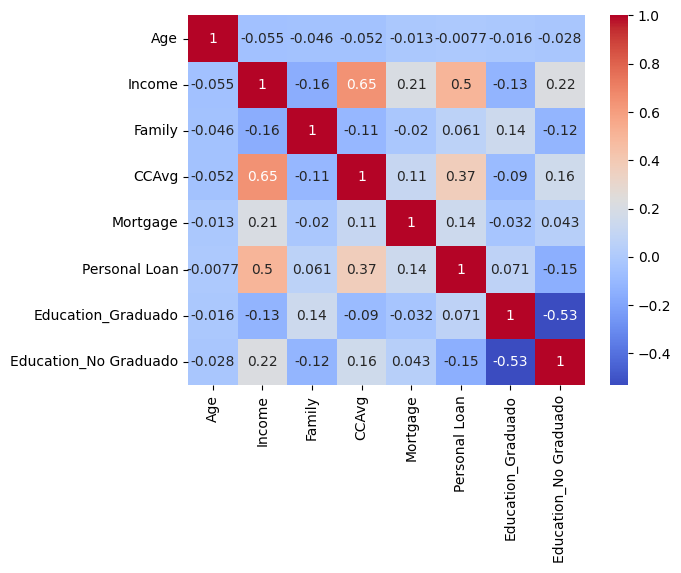

In [22]:
# correlacion entre las variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

c) Defina en un objeto X las variables predictoras y en Y la variable respuesta
Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción
5:1. Recuerde que la función train_test_split() es útil para realizar split simple,

además fije una semilla 2021 (random_state=2021 en la función
train_test_split()).

In [23]:
# Initialize the standard scaler
from sklearn.discriminant_analysis import StandardScaler


X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)


d) Obtenga un árbol de decisión con el set de datos de entrenamiento.
Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido,
¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué
alternativas pudieran probarse para abordar este problema?

In [43]:
# Create the decision tree classifier
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()
clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Confusion Matrix')

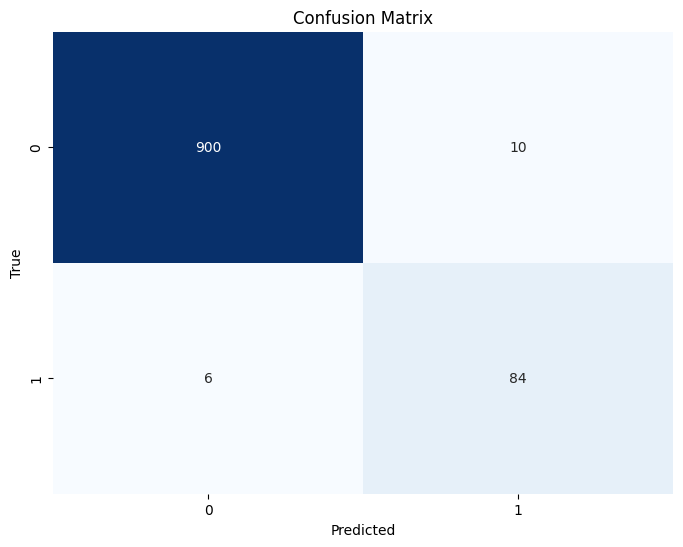

In [45]:
# Make predictions on the test set
y_pred = clf.predict(x_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

e) Plantee otro árbol de decisión pero definiendo como parámetro de control
o prepoda la profundidad máxima del árbol, para esto en la función
DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad
máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo
anterior. Observe el árbol obtenido. Comente.


f) Busque los mejores valores de los criterios de corte y máxima profundidad
para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint:
evalue los hiperparámetros criterion y max_depth)

Estamos usando gradient boosting!


TypeError: can only concatenate str (not "numpy.int64") to str

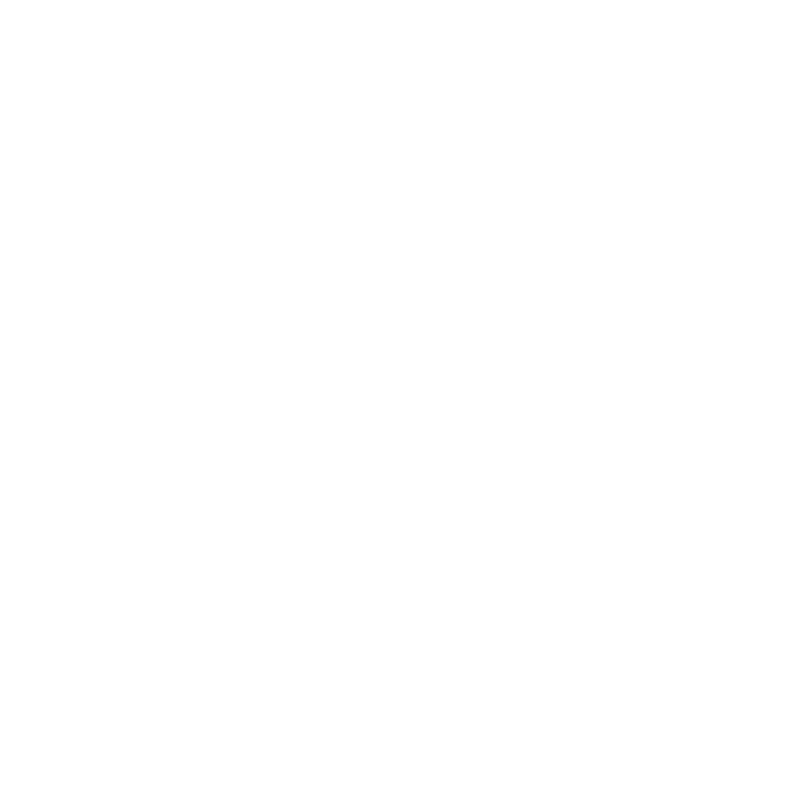

In [38]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

Accuracy: 0.987


Text(0.5, 1.0, 'Confusion Matrix')

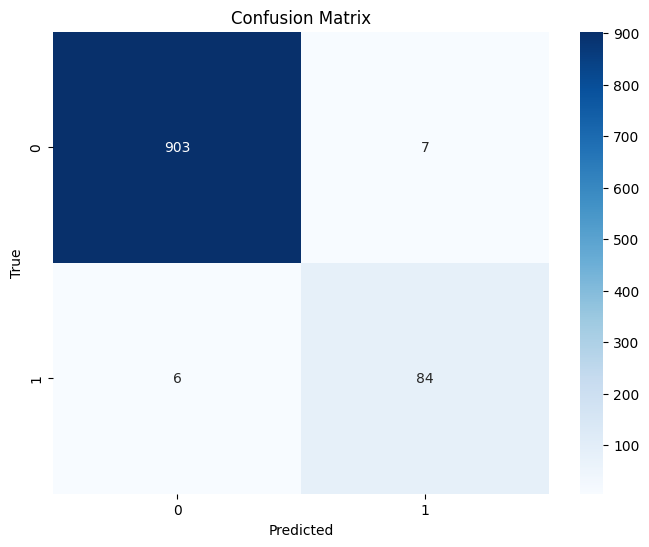

In [39]:
# Make predictions on the test set
y_pred = clf.predict(x_test_scaled)

# Accuracy
print("Accuracy:", clf.score(x_test_scaled, y_test))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Feature Importance')

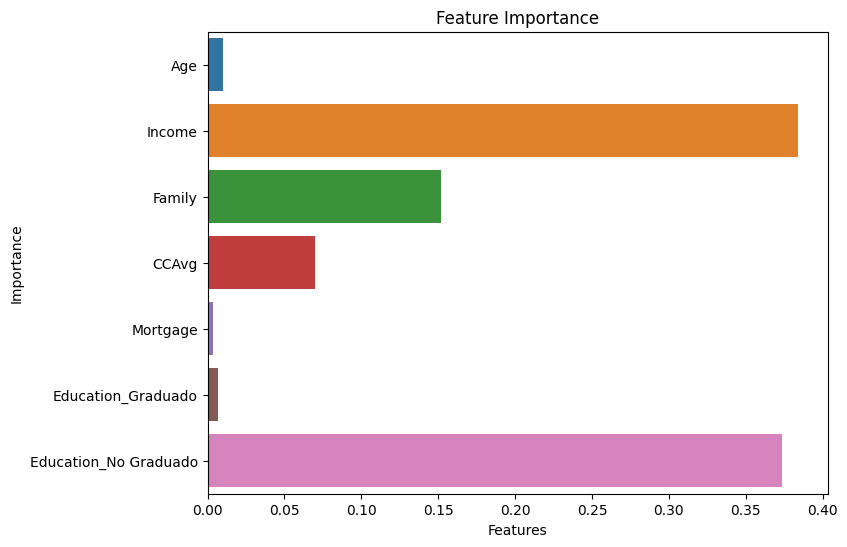

In [40]:
# Display the feature importances
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y=X.columns, x=clf.feature_importances_, ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')

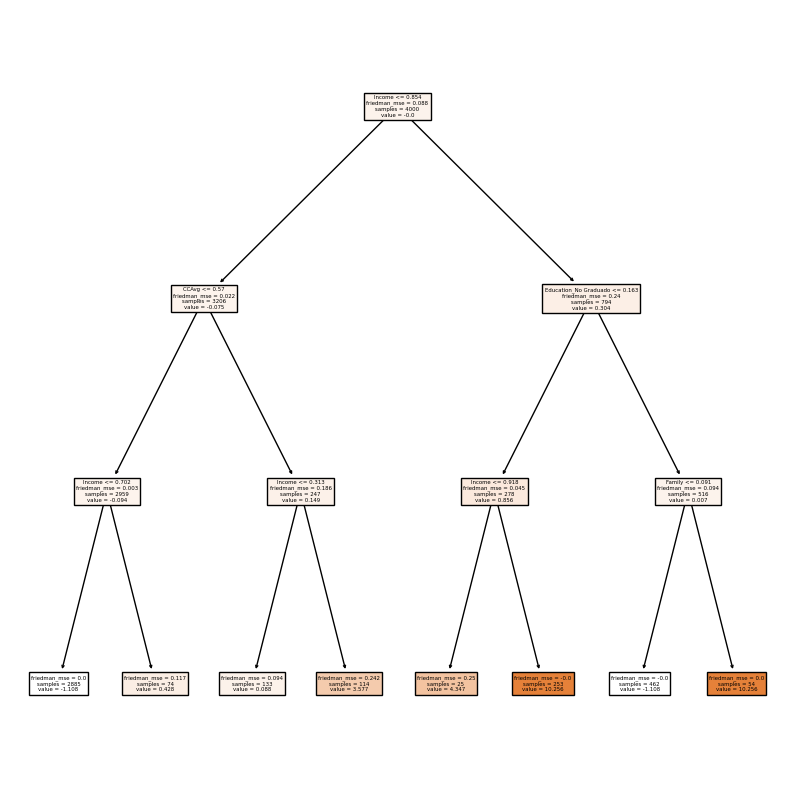

In [41]:
# Get the tree estimators from the fitted classifier
tree_estimators = clf.estimators_[0, :]

# Determine the tree with the largest weight based on the rank
rank = 0
tree_index = np.argsort(
    [tree.tree_.max_depth for tree in tree_estimators]
)[-rank - 1]


# Plot the selected tree
fig, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(
    tree_estimators[tree_index],
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True
)

In [42]:
# calculate mse
mse = np.mean((y_test - y_pred) ** 2)
print("MSE:", mse)

MSE: 0.013


Tiene un buen rendimiento y un bajo MSE

0.011